In [1]:
import numpy as np
import scipy
import scipy.sparse as sparse
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import time
import multiprocessing
import os
from copy import deepcopy
import random
import numpy.ma as ma

In [13]:
%run ../methodsMemoryDeposition
%run ../main_Zhi

EVERYONE IS DEAD AT: 2.156318712096253 | N_Ptcls: 5| N_snapshots: 1


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [14]:
params = {
    "init_cond":      "single",
    "height":               200,
    "dom":                  400,
    "ndim":                   1,
    "t_max":                100,
    "r_0":                   0.5,
    "tau":                    1,
    "dt_snapshot":            1,          
    "n_ptcl_snapshot":  np.infty,
    "keep_all":           True, 
    "foldername":   "../SimResults/",
    "filename":     "TestSingle",
    "seed":                None,
    "Whole_Lattice":       True,
    }

space_flat, max_height = main(params)

EVERYONE IS DEAD AT: 10.994461426907762 | N_Ptcls: 25| N_snapshots: 11


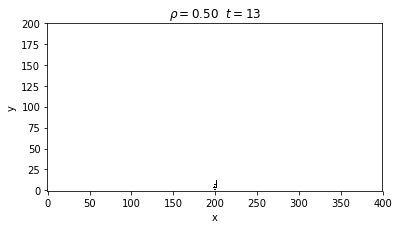

In [15]:
rho = params["r_0"]*params["tau"]

plot_surface(space_flat.transpose(), max_height = None,
            title = r"$\rho = $" + f"{rho:.2f}  " +  r"$t = $" + f"{13:.0f}",
            save = False,
            show = True,)

In [16]:
list_clusters_double_flat = calc_empty_clusters(space_flat, max_height, params, np.inf)


In [17]:
M, V, S = calc_MVS_empty_clusters(list_clusters_double_flat, params)

In [74]:
list_clusters_single_flat = unflat_empty_clusters(list_empty_clusters2, params)

In [ ]:
list_cluster_single_flat = []
shape_prev_flat = (np.power(params["dom"], params["ndim"]), params["height"])
Masses = []
Volumes = []
Sizes = []

for cluster in list_empty_clusters[1:5]:
    print("First Cluster")
    simple_flag = False
    if 0 in cluster and (params["init_cond"] == "single"):
        continue
        

    cluster_single_flat = []
    cluster_times = []
    cluster_volumes = np.zeros(params["height"])

    for coord_double_flat in cluster:
        coord_single_flat = np.unravel_index(coord_double_flat, shape_prev_flat)
        print(coord_single_flat)
        height_index = coord_single_flat[1]

        if coord_single_flat[1] == params["height"]-1: # Everything connected to last layer is removed
            simple_flag = True
            break #break out of the loop over coordinates

        cluster_volumes[height_index] += 1
        cluster_times.append(height_index)
        cluster_single_flat.append(coord_single_flat)
    
    if simple_flag: #Skips the appending, removes a cluster if flag is trigerred
        continue

    Masses.append(len(cluster)) #These do not happen if the flag is on. 
    Volumes.append(np.mean(cluster_volumes[np.nonzero(cluster_volumes)]))
    Sizes.append(np.max(cluster_times)-np.min(cluster_times))
    list_cluster_single_flat.append(cluster_single_flat)

mass = np.mean(Masses)
volume = np.mean(Volumes)
size = np.mean(Sizes)

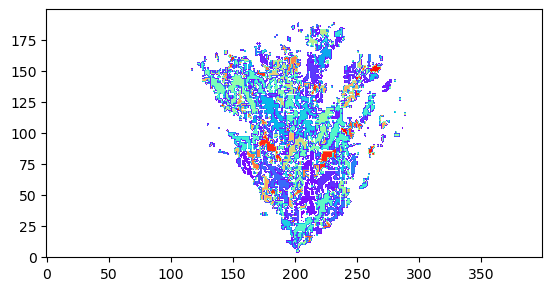

In [75]:
plt.figure()
images = []
shape_prev_flat = (np.power(params["dom"], params["ndim"]), params["height"])

colors = plt.cm.rainbow(np.linspace(0, 1, 256))
colors[0, :] = [1, 1, 1, 1]  # Set the first color to white

custom_rainbow_cmap = clrs.ListedColormap(colors)

single_cluster = np.zeros(shape_prev_flat)
for cluster in list_clusters_single_flat:
    random_color = np.random.rand(1)
    for coord in cluster:
        single_cluster[coord[0], coord[1]] = random_color

    img = single_cluster.reshape(shape_prev_flat).transpose()
    plt.imshow(img, cmap=custom_rainbow_cmap, origin= "lower")
    images.append(img)
plt.colormaps
plt.show()